In [34]:
import requests

# Endpoint de la API de CheapShark
url_sales = "https://www.cheapshark.com/api/1.0/deals"

url_stores = "https://www.cheapshark.com/api/1.0/stores"

# Parámetros para la solicitud (puedes personalizarlos según la documentación de la API)
params = {
    #"storeID": 25,     # ID de la tienda (opcional)
    #"upperPrice": 100, # Precio máximo (opcional)
    "pageNumber": 0   # Número de página (opcional)
}

# Realizar la solicitud GET
response_sales = requests.get(url_sales, params=params)
response_stores = requests.get(url_stores)

# Verificar si la solicitud fue exitosa
if response_sales.status_code == 200:
    # Convertir la respuesta JSON a un diccionario de Python
    deals = response_sales.json()

if response_stores.status_code == 200:
    stores = response_stores.json()
    

In [35]:
deals[0].keys()

dict_keys(['internalName', 'title', 'metacriticLink', 'dealID', 'storeID', 'gameID', 'salePrice', 'normalPrice', 'isOnSale', 'savings', 'metacriticScore', 'steamRatingText', 'steamRatingPercent', 'steamRatingCount', 'steamAppID', 'releaseDate', 'lastChange', 'dealRating', 'thumb'])

In [36]:
for x in deals:
    print(x["title"])
    print(x["salePrice"])
    print(x["normalPrice"])
    print(x["savings"])

Football Manager 2024
0.00
59.99
100.000000
Sniper Ghost Warrior Contracts
0.00
29.99
100.000000
The Incredible Adventures of Van Helsing Anthology
5.63
74.99
92.492332
Cycling Bundle 2021
7.83
69.58
88.746766
Tennis World Tour Legends Edition
7.88
69.98
88.739640
Assassin's Creed Odyssey - Deluxe Edition
11.19
79.99
86.010751
Warhammer Age of Sigmar: Realms of Ruin Ultimate Edition
12.29
74.99
83.611148
Assassins Creed Origins Gold Edition
13.88
99.99
86.118612
Sid Meiers Civilization VI: Platinum Edition
8.89
79.99
88.886111
Assassins Creed Odyssey Gold Edition
13.99
99.99
86.008601
Assassins Creed Odyssey Ultimate Edition
16.69
119.99
86.090508
Warhammer Age of Sigmar: Realms of Ruin Ultimate Edition
13.49
74.99
82.010935
Warhammer Age of Sigmar: Realms of Ruin Ultimate Edition
13.50
74.99
81.997600
Sid Meiers Civilization VI: Platinum Edition
10.44
79.99
86.948369
BioShock Infinite
3.19
29.99
89.363121
NHRA: Speed for All - Ultimate Edition
7.99
79.99
90.011251
Chivalry - 4 Pack
12

In [37]:
dict_tiendas = {}

for x in stores:
    dict_tiendas[x["storeID"]] = x["storeName"]

dict_tiendas

{'1': 'Steam',
 '2': 'GamersGate',
 '3': 'GreenManGaming',
 '4': 'Amazon',
 '5': 'GameStop',
 '6': 'Direct2Drive',
 '7': 'GOG',
 '8': 'Origin',
 '9': 'Get Games',
 '10': 'Shiny Loot',
 '11': 'Humble Store',
 '12': 'Desura',
 '13': 'Uplay',
 '14': 'IndieGameStand',
 '15': 'Fanatical',
 '16': 'Gamesrocket',
 '17': 'Games Republic',
 '18': 'SilaGames',
 '19': 'Playfield',
 '20': 'ImperialGames',
 '21': 'WinGameStore',
 '22': 'FunStockDigital',
 '23': 'GameBillet',
 '24': 'Voidu',
 '25': 'Epic Games Store',
 '26': 'Razer Game Store',
 '27': 'Gamesplanet',
 '28': 'Gamesload',
 '29': '2Game',
 '30': 'IndieGala',
 '31': 'Blizzard Shop',
 '32': 'AllYouPlay',
 '33': 'DLGamer',
 '34': 'Noctre',
 '35': 'DreamGame'}

In [38]:
deals[0]

{'internalName': 'FOOTBALLMANAGER2024',
 'title': 'Football Manager 2024',
 'metacriticLink': '/game/football-manager-2024/',
 'dealID': 'RdobOWYozyvPqR%2FGjn1f9Y2z032XOy2pmFT17rAJspA%3D',
 'storeID': '25',
 'gameID': '272713',
 'salePrice': '0.00',
 'normalPrice': '59.99',
 'isOnSale': '1',
 'savings': '100.000000',
 'metacriticScore': '84',
 'steamRatingText': 'Very Positive',
 'steamRatingPercent': '90',
 'steamRatingCount': '9579',
 'steamAppID': '2252570',
 'releaseDate': 1699228800,
 'lastChange': 1725549775,
 'dealRating': '10.0',
 'thumb': 'https://shared.akamai.steamstatic.com/store_item_assets/steam/apps/2252570/capsule_sm_120.jpg?t=1702984758'}

In [39]:
# dict_juegos = {}

# for x in deals:
#     dict_juegos[x["title"]] = [x["storeID"], x["savings"].split('.')[0], x["metacriticScore"]]

# dict_juegos

In [40]:
lista_tiendas = []
lista_nombres = []
lista_descuento = []
lista_metacritic = []



for x in deals:
   # if x["storeID"] not in lista_tiendas:
        lista_tiendas.append(dict_tiendas[x["storeID"]])
    
  #  if x["title"] not in lista_nombres:
        lista_nombres.append(x["title"])
    
   # if x["savings"] not in lista_descuento:
        lista_descuento.append(round( float(x["savings"]), 2) )
    
  #  if x["metacriticScore"] not in lista_metacritic:
        lista_metacritic.append(float(x["metacriticScore"]))

In [41]:
import pandas as pd

lista_zip = list(zip(lista_nombres, lista_tiendas, lista_descuento, lista_metacritic))

In [42]:
df_all = pd.DataFrame(lista_zip, columns=['título', 'tienda', 'porcentaje_descuento', 'metacritic'])

In [43]:
from datetime import datetime

fecha_actual = datetime.now().strftime("%d-%m-%Y")

df_all.to_csv(f"data/registro_{fecha_actual}")

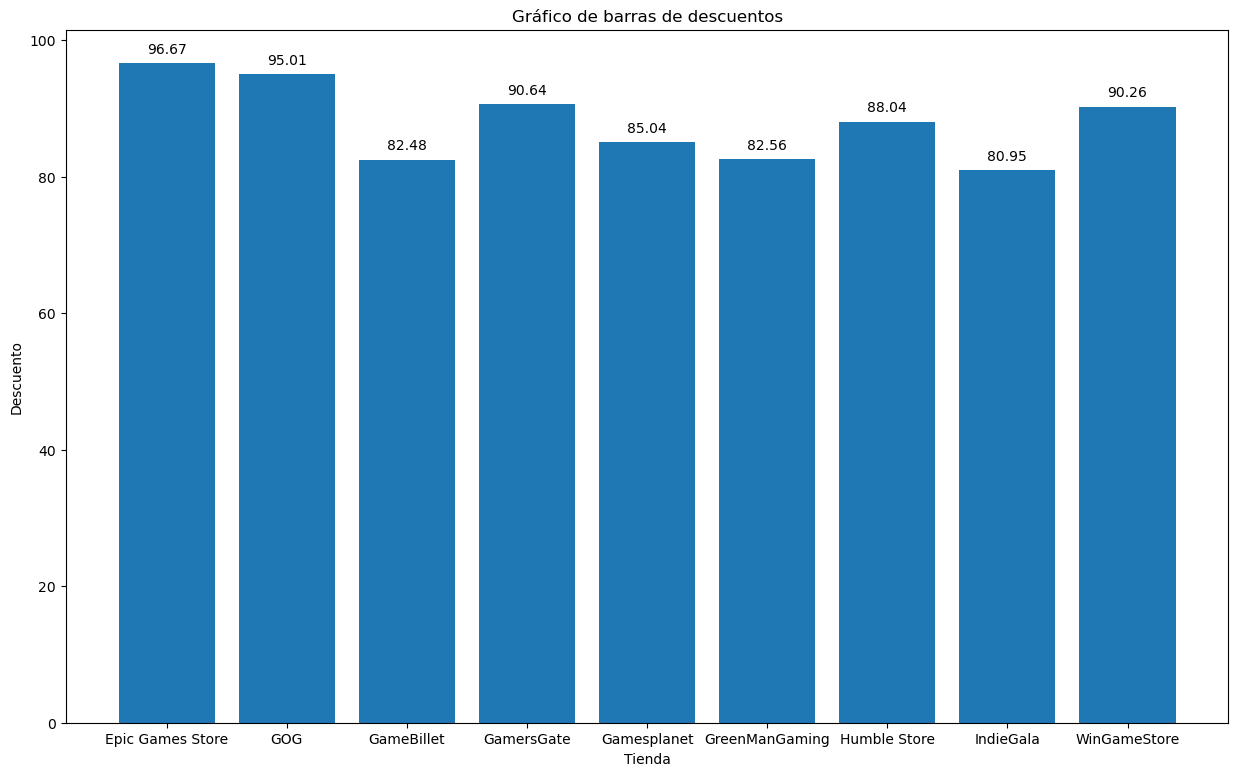

In [44]:
import matplotlib.pyplot as plt

df_graf_barras = df_all.groupby('tienda')['porcentaje_descuento'].mean().reset_index()
# Same as df_graf_barras = df_all.groupby('tienda').agg({'porcentaje_descuento' : 'mean'})

plt.figure(figsize=(15, 9))
plt.bar(df_graf_barras['tienda'], df_graf_barras['porcentaje_descuento'])

# Agregar etiquetas a cada barra
for i, valor in enumerate(df_graf_barras['porcentaje_descuento']):
    plt.text(i, valor + 1, f"{valor:.2f}", ha='center', va='bottom')

plt.title('Gráfico de barras de descuentos')
plt.xlabel('Tienda')
plt.ylabel('Descuento')
plt.show()